# **Trabajo de Preparación y Limpieza de Datos** 

##### **Joaquín Joana Azuara - Máster Big Data Science - Universidad de Navarra**

Fuente: Kaggle https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Contexto

No hay ninguna duda de que a los hoteles no les interesa que se cancelen reservar de habitaciones por motivos económicos (tanto desde el punto de vista de los beneficios como de los costes fijos (CF) y variables (CV)).
Por ello, considero que sería de gran interés que las cadenas hoteleras puedan predecir con un relevante nivel de seguridad, si un cliente puede llegar a cancelar una reserva según las características de este. 

Algunos de los intereses que tienen los hoteles en todo esto son: 
- **Maximizar la ocupación:** si el hotel es capaz de predecir con precisión cuántos clientes van a cancelar la reserva, puede ajustar su estrategia de precios para así maximizar la ocupación y minimizar las habitaciones vacías. Incluso dentro de esta misma estrategia, se pueden establecer precios dependiendo del margen de cancelación que se deje (por ejemplo, no tendría el mismo precio una habitación que deja un margen de cancelacion de la reserva de una semana que de otra que deja un mes. Serían más caras y más baratas respectivamente). 

- **Reducción de los costes:** si por ejemplo, el hotel ofrece una gran variedad de servicios y la ocupación rondara un 70%, podría minimizar costes variables (CV) pudiendo prescindir de algunos servicios...

- **Capacidad de tomar medidas con antelación:** Si el modelo es realmente fiable, es decir, que me clasifica correctamente las que sí se cancelan de las que no se cancelan. Si se lograra este grado de fiabilidad, los hoteles serían capaces de hacer contraofertas a aquellos clientes que tienen posibilidades de que cancelen sus reservas. Es importante que el modelo sea fiable, porque si no, podemos estar haciendo ofertas a usuarios que no nos interesa hacérsolo.

## Variables


- **Booking_ID:** Identificador único de cada reserva
- **no_of_adults:** numero de adultos
- **no_of_children:** numero de niños
- **no_of_weekend_nights:** Número de noches de fin de semana (sábado o domingo) en el que el huésped se alojó o reservó para alojarse en el hotel
- **no_of_week_nights:** Número de noches de semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel
- **type_of_meal_plan:** Tipo de régimen de comidas reservado por el cliente:
- **required_car_parking_space:** ¿El cliente necesita una plaza de aparcamiento? (0 - No, 1- Sí)
- **room_type_reserved:** Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.
- **lead_time:** Número de días entre la fecha de reserva y la fecha de llegada
- **arrival_year:** Año de llegada
- **arrival_month:** Mes de llegada
- **arrival_date:** Día de llegada
- **market_segment_type:** Designación del segmento de mercado.
- **repeated_guest:** ¿El cliente es un invitado repetido? (0 - No, 1- Sí)
- **no_of_previous_cancellations:** Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
- **no_of_previous_bookings_not_canceled:** Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
- **avg_price_per_room:** Precio medio por día de la reserva; Los precios de las habitaciones son dinámicos. (en euros)
- **no_of_special_requests:** Número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.)
- **booking_status:** Bandera que indica si la reserva fue cancelada o no. **(VARIABLE OBJETIVO)**

## Objetivo 

**El objetivo es ser capaces de precedir si un cliente va a mantener o cancelar la reserva de hotel. 
Para ello se empleará un modelo de regresión logística (de clasificación).**

# **ÍNDICE**

#### **1. Carga y Limpieza de Datos**
         1.1. Carga de Datos
         1.2. Limpieza de Datos
#### **2. Visualización de Datos**
         2.1. Room Type Reserved vs Booking Status
         2.2. Type of Meal Plan vs Booking Status
         2.3. Market Segment Type vs Booking Status
#### **3. Preprocesamiento de los Datos**
         3.1. Codificamos las variables categóricas en numéricas
         3.2. Estandarizamos los datos del DataFrame df_copia2
         3.3. Train & Test
#### **4. Entrenamiento y Validación del Modelo**
         4.1. Instanciamos y Aplicamos el Modelo de Regresión Logística
         4.2. Matriz de Confusión
         4.3.Curva de ROC

# **1. CARGA Y LIMPIEZA DE DATOS**

In [1]:
import pandas as pd
import numpy as np
#import pandas_profiling
import calendar
# Preprocesado y modelado
# ==============================================================================
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# ==============================================================================
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from skimpy import skim
# ==============================================================================
##display plots and visualizations that are generated by the matplotlib library within the current output cell. This code is often used at the beginning of a program to allow plots to be displayed in the output of the program.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score

#### **1.1 Carga de Datos**

In [2]:
df = pd.read_csv('C:/Users/Usuario/OneDrive/MASTER BIG DATA/ASIGNATURAS MÁSTER/Preparación y Limpieza de Datos/Trabajo asignatura/Hotel Reservations.csv', dayfirst=True)
display(df)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### **1.2. Limpieza de Datos**

In [3]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 36275  │ │ int32       │ 13    │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ no_of_adults                │    0 │      0 │     1.8 │   0.52 │      0 │      2 │     2 │     4 │   ▂ █▁  │  │
│ │ no_of_children              │    0 │      0 │    0.11 │    0.4 │      0 │      0 │     0 │    10 │    █    │  │
│ │ no_of_weekend_nights        │    0 │      0 │    0.81 │   0.87 │      0 │      0 │     2 │     7 │   █▃    │  │
│ │ no_of_week_nights           │    0 │      0 │     2.2 │    1.4 │      0 │      1 │     3 │    17 │   █▄    │  │
│ │ required_car_parking        │    0 │      0 │   0.031 │   0.17 │      0 │      0 │     0 │     1 │    █    │  │
│ │ lead_time                   │    0 │      0 │      85 │     86 │      0 │     17 │   130 │   440 │  █▃▂▁   │  │
│ │ arrival_year                │    0 │      0 │    2000 │   0.38 │   2000 │   2000 │  2000 │  2000 │ ▂    █  │  │
│ │ arrival_month               │    0 │      0 │     7.4 │    3.1 │      1 │      5 │    10 │    12 │ ▂▄▅▅█▅  │  │
│ │ arrival_date                │    0 │      0 │      16 │    8.7 │      1 │      8 │    23 │    31 │ ▇▇██▇█  │  │
│ │ repeated_guest              │    0 │      0 │   0.026 │   0.16 │      0 │      0 │     0 │     1 │    █    │  │
│ │ no_of_previous_cance        │    0 │      0 │   0.023 │   0.37 │      0 │      0 │     0 │    13 │    █    │  │
│ │ no_of_previous_booki        │    0 │      0 │    0.15 │    1.8 │      0 │      0 │     0 │    58 │    █    │  │
│ │ avg_price_per_room          │    0 │      0 │     100 │     35 │      0 │     80 │   120 │   540 │   ▅█    │  │
│ │ no_of_special_reques        │    0 │      0 │    0.62 │   0.79 │      0 │      0 │     1 │     5 │   █▅▂   │  │
│ └─────────────────────────────┴──────┴────────┴─────────┴────────┴────────┴────────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Booking_ID                           │     0 │         0 │                        1 │                36000 │  │
│ │ type_of_meal_plan                    │     0 │         0 │                        1 │                36000 │  │
│ │ room_type_reserved                   │     0 │      

- Identificar las columnas que tienen un valor único ----> no hay ninguna.(En caso de que hubiera una columna con un valor único, se eliminaría).

In [4]:
for i in df.columns:
  print(i, len(df[i].unique()))

Booking_ID 36275
no_of_adults 5
no_of_children 6
no_of_weekend_nights 8
no_of_week_nights 18
type_of_meal_plan 4
required_car_parking_space 2
room_type_reserved 7
lead_time 352
arrival_year 2
arrival_month 12
arrival_date 31
market_segment_type 5
repeated_guest 2
no_of_previous_cancellations 9
no_of_previous_bookings_not_canceled 59
avg_price_per_room 3930
no_of_special_requests 6
booking_status 2


- Considerar las columnas que tienen muy pocos valores.

In [5]:
print(df.shape,df.shape[0])
for i in df.columns:
  #número de valores únicos para cada variable como un porcentaje del total número de filas en el conjunto de datos
  percentage = float(len(df[i].unique())) / df.shape[0] * 100
  print('%s, %d, %.2f%%' % (i,len(df[i].unique()), percentage))

(36275, 19) 36275
Booking_ID, 36275, 100.00%
no_of_adults, 5, 0.01%
no_of_children, 6, 0.02%
no_of_weekend_nights, 8, 0.02%
no_of_week_nights, 18, 0.05%
type_of_meal_plan, 4, 0.01%
required_car_parking_space, 2, 0.01%
room_type_reserved, 7, 0.02%
lead_time, 352, 0.97%
arrival_year, 2, 0.01%
arrival_month, 12, 0.03%
arrival_date, 31, 0.09%
market_segment_type, 5, 0.01%
repeated_guest, 2, 0.01%
no_of_previous_cancellations, 9, 0.02%
no_of_previous_bookings_not_canceled, 59, 0.16%
avg_price_per_room, 3930, 10.83%
no_of_special_requests, 6, 0.02%
booking_status, 2, 0.01%


- Identificar las filas que contienen datos duplicados y Eliminar filas que contienen datos duplicados ---> no hay ninguna.

In [6]:
dups = df.duplicated()
# print(dups)  este devolvería fila por fila si es duplicada 
# report if there are any duplicates
print(dups.any())  # esta devuleve el False que se ve por pantalla que indica si hay alguna fila que sea True, por eso sale False, porque no hay ninguna repetida.
print("*"*10)
# list all duplicate rows
print(df[dups])

False
**********
Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


- Contamos el número de valores nulos en cada columna ---> no hay valores nulos en ninguna de las columnas.

In [8]:
#cuenta el % de nulos de cada columna
for i in df.columns:
  # count number of rows with missing values
  n_miss = df[i].isnull().sum()
  perc = n_miss / df.shape[0] * 100
  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))


> Booking_ID, Missing: 0 (0.0%)
> no_of_adults, Missing: 0 (0.0%)
> no_of_children, Missing: 0 (0.0%)
> no_of_weekend_nights, Missing: 0 (0.0%)
> no_of_week_nights, Missing: 0 (0.0%)
> type_of_meal_plan, Missing: 0 (0.0%)
> required_car_parking_space, Missing: 0 (0.0%)
> room_type_reserved, Missing: 0 (0.0%)
> lead_time, Missing: 0 (0.0%)
> arrival_year, Missing: 0 (0.0%)
> arrival_month, Missing: 0 (0.0%)
> arrival_date, Missing: 0 (0.0%)
> market_segment_type, Missing: 0 (0.0%)
> repeated_guest, Missing: 0 (0.0%)
> no_of_previous_cancellations, Missing: 0 (0.0%)
> no_of_previous_bookings_not_canceled, Missing: 0 (0.0%)
> avg_price_per_room, Missing: 0 (0.0%)
> no_of_special_requests, Missing: 0 (0.0%)
> booking_status, Missing: 0 (0.0%)


- Para ver cuáles son las fechas que son de febrero y que ponen un día 29, esto es imposible ya que 2018 no es bisiesto ----> los registros con día 29, mes febrero y año 2018 se eliminan.

In [9]:
for i, row in df.iterrows():
    day, month, year = row['arrival_date'], row['arrival_month'], row['arrival_year']
    max_day = calendar.monthrange(year, month)[1]
    if day > max_day:
        print(f"Error en fila {i}: el día {day} está fuera del rango permitido para el mes {month} del año {year}")

Error en fila 2626: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 3677: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 5600: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 6343: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 7648: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 8000: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 8989: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 9153: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 9245: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 9664: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 9934: el día 29 está fuera del rango permitido para el mes 2 del año 2018
Error en fila 10593: el día 29 e

In [10]:
# eliminar filas con fechas no válidas
rows_to_drop = []
for i, row in df.iterrows():
    day, month, year = row['arrival_date'], row['arrival_month'], row['arrival_year']
    max_day = calendar.monthrange(year, month)[1]
    if day > max_day:
        rows_to_drop.append(i)

df = df.drop(rows_to_drop, axis=0)

In [11]:
display(df)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# **2. VISUALIZACIÓN DE DATOS**

Aclaración: cada uno de los % de cada tipo (según si se ha cancelado o no), se han calculado sobre el ' Total ' de ese tipo. 

*Ejem:   % Not Canceled = total(not canceled de room tipo 1) / Total room tipo 1*

En los tres gráficos siguientes, si comparamos la caraterísticas *'room_type_reserved', 'type_of_meal_plan', 'market_segment_type'* con la objetivo *'booking status'*, la proporción de las que se NO se cancelan es siempre mayor que las que sí se cancelan.

#### **2.1. Room Type Reserved vs Booking Status**

                  Room_Type 1  Room_Type 4  Room_Type 6  Room_Type 2  \
Total            28105.000000  6049.000000   964.000000   692.000000   
 % Canceled         32.257605    34.187469    42.116183    32.947977   
 % Not Canceled     67.742395    65.812531    57.883817    67.052023   

                 Room_Type 5  Room_Type 7  Room_Type 3  
Total             263.000000    158.00000     7.000000  
 % Canceled        27.376426     22.78481    28.571429  
 % Not Canceled    72.623574     77.21519    71.428571  


<AxesSubplot: >

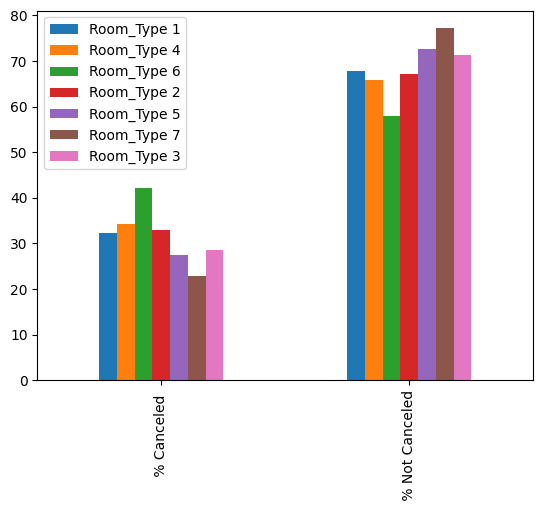

In [12]:
total1 = df['room_type_reserved'].value_counts()
canceled_roomtype = df[df['booking_status']=='Canceled']['room_type_reserved'].value_counts() / total1*100
notcanceled_roomtype = df[df['booking_status']=='Not_Canceled']['room_type_reserved'].value_counts() / total1*100
df1 = pd.DataFrame([total1,canceled_roomtype,notcanceled_roomtype])
df1.index = ['Total',' % Canceled ',' % Not Canceled']
print(df1)

grafico1 = df1.copy()
grafico1.drop('Total', axis=0, inplace=True)

grafico1.plot(kind='bar')

#### **2.2.  Type of Meal Plan vs Booking Status**

                  Meal Plan 1  Not Selected  Meal Plan 2  Meal Plan 3
Total            27802.000000   5129.000000  3302.000000          5.0
 % Canceled         31.195597     33.105869    45.608722         20.0
 % Not Canceled     68.804403     66.894131    54.391278         80.0


<AxesSubplot: >

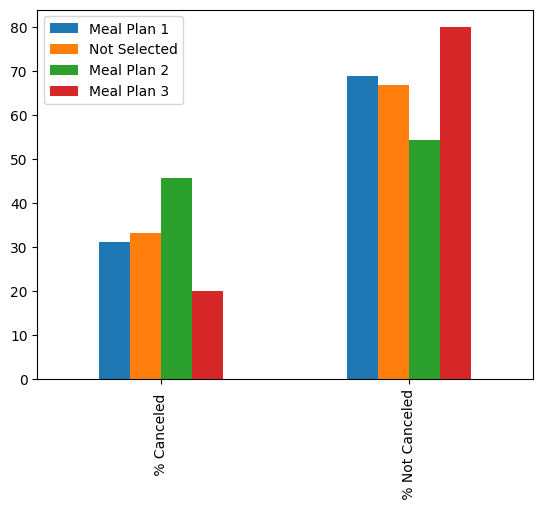

In [13]:
total2 = df['type_of_meal_plan'].value_counts()
canceled_mealtype = df[df['booking_status']=='Canceled']['type_of_meal_plan'].value_counts() / total2*100
notcanceled_mealtype = df[df['booking_status']=='Not_Canceled']['type_of_meal_plan'].value_counts() / total2*100
df2 = pd.DataFrame([total2,canceled_mealtype, notcanceled_mealtype])
df2.index = ['Total',' % Canceled ', ' % Not Canceled']
print(df2)

grafico2 = df2.copy()
grafico2.drop('Total', axis=0, inplace=True)

grafico2.plot(kind='bar')

#### **2.3. Market Segment Type vs Booking Status**
Un dato a destacar, es que cuando la reserva se realiza a traves de 'complementary' de las 390 reservas que se hacen de este modo, no hay ninguna que se cancele.

                       Online       Offline    Corporate  Complementary  \
Total            23194.000000  10518.000000  2011.000000          390.0   
 % Canceled         36.513754     29.967674    10.939831            NaN   
 % Not Canceled     63.486246     70.032326    89.060169          100.0   

                 Aviation  
Total               125.0  
 % Canceled          29.6  
 % Not Canceled      70.4  


<AxesSubplot: >

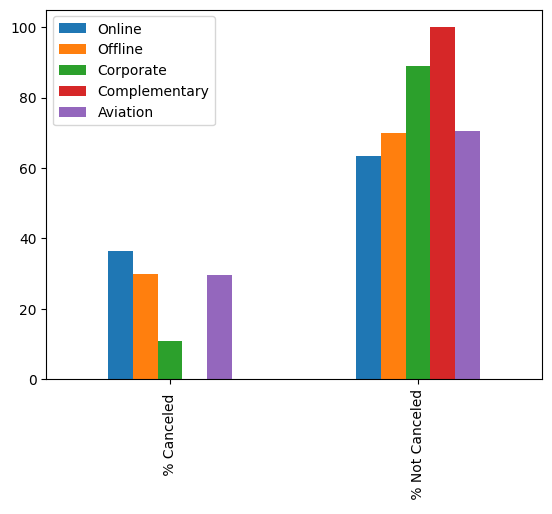

In [14]:
total3 = df['market_segment_type'].value_counts()
canceled_marketsegmnt = df[df['booking_status']=='Canceled']['market_segment_type'].value_counts() / total3*100
notcanceled_marketsegmnt = df[df['booking_status']=='Not_Canceled']['market_segment_type'].value_counts() / total3*100
df3 = pd.DataFrame([total3,canceled_marketsegmnt, notcanceled_marketsegmnt])
df3.index = ['Total',' % Canceled ', ' % Not Canceled']
print(df3)

grafico3 = df3.copy()
grafico3.drop('Total', axis=0, inplace=True)

grafico3.plot(kind='bar')

# **3. PREPROCESAMIENTO DE LOS DATOS**

- Vemos qué tipos de Datos tenemos : se puede observar que tenemos variables object que son de tipo categórico, por ello tendremos que codificarlas usando one-hot-encoder.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36238 non-null  object 
 1   no_of_adults                          36238 non-null  int64  
 2   no_of_children                        36238 non-null  int64  
 3   no_of_weekend_nights                  36238 non-null  int64  
 4   no_of_week_nights                     36238 non-null  int64  
 5   type_of_meal_plan                     36238 non-null  object 
 6   required_car_parking_space            36238 non-null  int64  
 7   room_type_reserved                    36238 non-null  object 
 8   lead_time                             36238 non-null  int64  
 9   arrival_year                          36238 non-null  int64  
 10  arrival_month                         36238 non-null  int64  
 11  arrival_date   

También sabemos que hay variables que no nos aportan nada de información como es el caso de 'Booking Id', por ello se eliminan.

In [16]:
df_copia = df.copy()
df_copia.drop(['Booking_ID'], inplace=True, axis=1)

display(df_copia)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### **3.1. Codificamos las variables categóricas en numéricas**

- Codificación de la variable objetivo 'booking_status'.

1 = Not Canceled

0 = Canceled

In [17]:
df_copia['booking_status'] = pd.get_dummies(df_copia['booking_status'], drop_first=True)
df_copia['booking_status'] 

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36238, dtype: uint8

- Codificación de la variable 'type_of_meal_plan'.

In [18]:
type_of_meal_plan2 = pd.get_dummies(df_copia['type_of_meal_plan'], drop_first=False)
type_of_meal_plan2

,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
36270,1,0,0,0
36271,1,0,0,0
36272,1,0,0,0
36273,0,0,0,1


- Codificación de la variable 'room_type_reserved'.

En este punto, se ha de mencionar que debido a que depués de haber realizado la matriz de correlación (la cual se hace más a delante, depués de haber codificado todas las variables categóricas), se podía observar que Room_Type_1 y Room_Type_4 tenían una correlación inversa muy alta (-0.83), por ello se decidió eliminar Room_Type_1 ya que una venía a indicar casi lo mismo que la otra.

In [19]:
room_type_reserved2 = pd.get_dummies(df_copia['room_type_reserved'], drop_first=True)
room_type_reserved2

,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
36270,0,0,1,0,0,0
36271,0,0,0,0,0,0
36272,0,0,0,0,0,0
36273,0,0,0,0,0,0


- Codificación de la variable 'market_segment_type'.

En este punto, se ha de mencionar que debido a que depués de haber realizado la matriz de correlación (la cual se hace más a delante, depués de haber codificado todas las variables categóricas), se podía observar que Online y Offline tenían una correlación inversa muy alta (-0.85), por ello se decidió eliminar Online.

In [20]:
market_segment_type2 = pd.get_dummies(df_copia['market_segment_type'], drop_first=False)
market_segment_type2

,Aviation,Complementary,Corporate,Offline,Online
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
36270,0,0,0,0,1
36271,0,0,0,0,1
36272,0,0,0,0,1
36273,0,0,0,0,1


In [21]:
market_segment_type2.drop(['Online'], axis=1, inplace=True)

In [22]:
print(df_copia.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


En el siguiente DataFrame no incluiremos 'booking_status' ya que es nuestra variable a predecir. Crearemos otro DataFrame para nuestra varaible objetivo.

In [23]:
df_copia2 = pd.concat([df_copia['no_of_adults'],df_copia['no_of_children'],df_copia['no_of_weekend_nights'],df_copia['no_of_week_nights'], 
                       type_of_meal_plan2, df_copia['required_car_parking_space'], room_type_reserved2, df_copia['lead_time'],df_copia['arrival_year'], 
                       df_copia['arrival_month'], df_copia['arrival_date'], market_segment_type2, df_copia['repeated_guest'], df_copia['no_of_previous_cancellations'], 
                       df_copia['no_of_previous_bookings_not_canceled'], df_copia['avg_price_per_room'], df_copia['no_of_special_requests']], axis=1)
df_copia2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,required_car_parking_space,Room_Type 2,...,arrival_date,Aviation,Complementary,Corporate,Offline,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,0,0,0,0,...,2,0,0,0,1,0,0,0,65.00,0
1,2,0,2,3,0,0,0,1,0,0,...,6,0,0,0,0,0,0,0,106.68,1
2,1,0,2,1,1,0,0,0,0,0,...,28,0,0,0,0,0,0,0,60.00,0
3,2,0,0,2,1,0,0,0,0,0,...,20,0,0,0,0,0,0,0,100.00,0
4,2,0,1,1,0,0,0,1,0,0,...,11,0,0,0,0,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,167.80,1
36271,2,0,1,3,1,0,0,0,0,0,...,17,0,0,0,0,0,0,0,90.95,2
36272,2,0,2,6,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,98.39,2
36273,2,0,0,3,0,0,0,1,0,0,...,21,0,0,0,0,0,0,0,94.50,0


- Se dibuja la matriz de correlación después de haber eliminado las caraterísticas que no aportaban valor al análisis. Además, también se descarta como se ha comentado anteriormente, aquellas variables que presentaban colinealidad para así evitar el sobreajuste. 

- De todos modos, todavía quedan variables que presentan una correlación inversa, como por ejemplo de -0.74 y -0.57 y otra de correlación positiva de 0.65, pero no las elimino ya que no considero que sean unos niveles de colineadad tan elevados como para descartarlas.

**¡ MENCIÓN IMPORTANTE !** 

También se trató de evaluar el modelo eliminando valores outliers. Consideré que sería interesante eliminar los outliers de las varibles 'lead_time' y de 'avg_price_per_room' y el número de regrsitros pasó de los 36.238 a los 29.361... Para eliminar los outliers, calculé los máximos y mínimos aceptable aplicándo una desviación típica de 1.5. 

Una vez eliminados los valores outliers, se dibujó la matriz de correlación y se podía observar que existía colinealidad entre la variable 'Meal Plan 1' y 'Not Selected', por ello decidí eliminar la variable 'Not Selected' (la correlación era de -0.82).

Lo que se hizo a continuación fue lo mismo que lo que se ha implementado en este mismo Notebook y los resultados eran mínimamente diferentes: 

        - Precisión del conjunto de entrenamiento: 0.783
        - Precisión del conjunto de prueba: 0.791
Y en la Curva de ROC, el AUC era: 

        - AUC = 0.8186

(La conclusión sobre qué modelo sería mejor se comentará al final del Notebook)

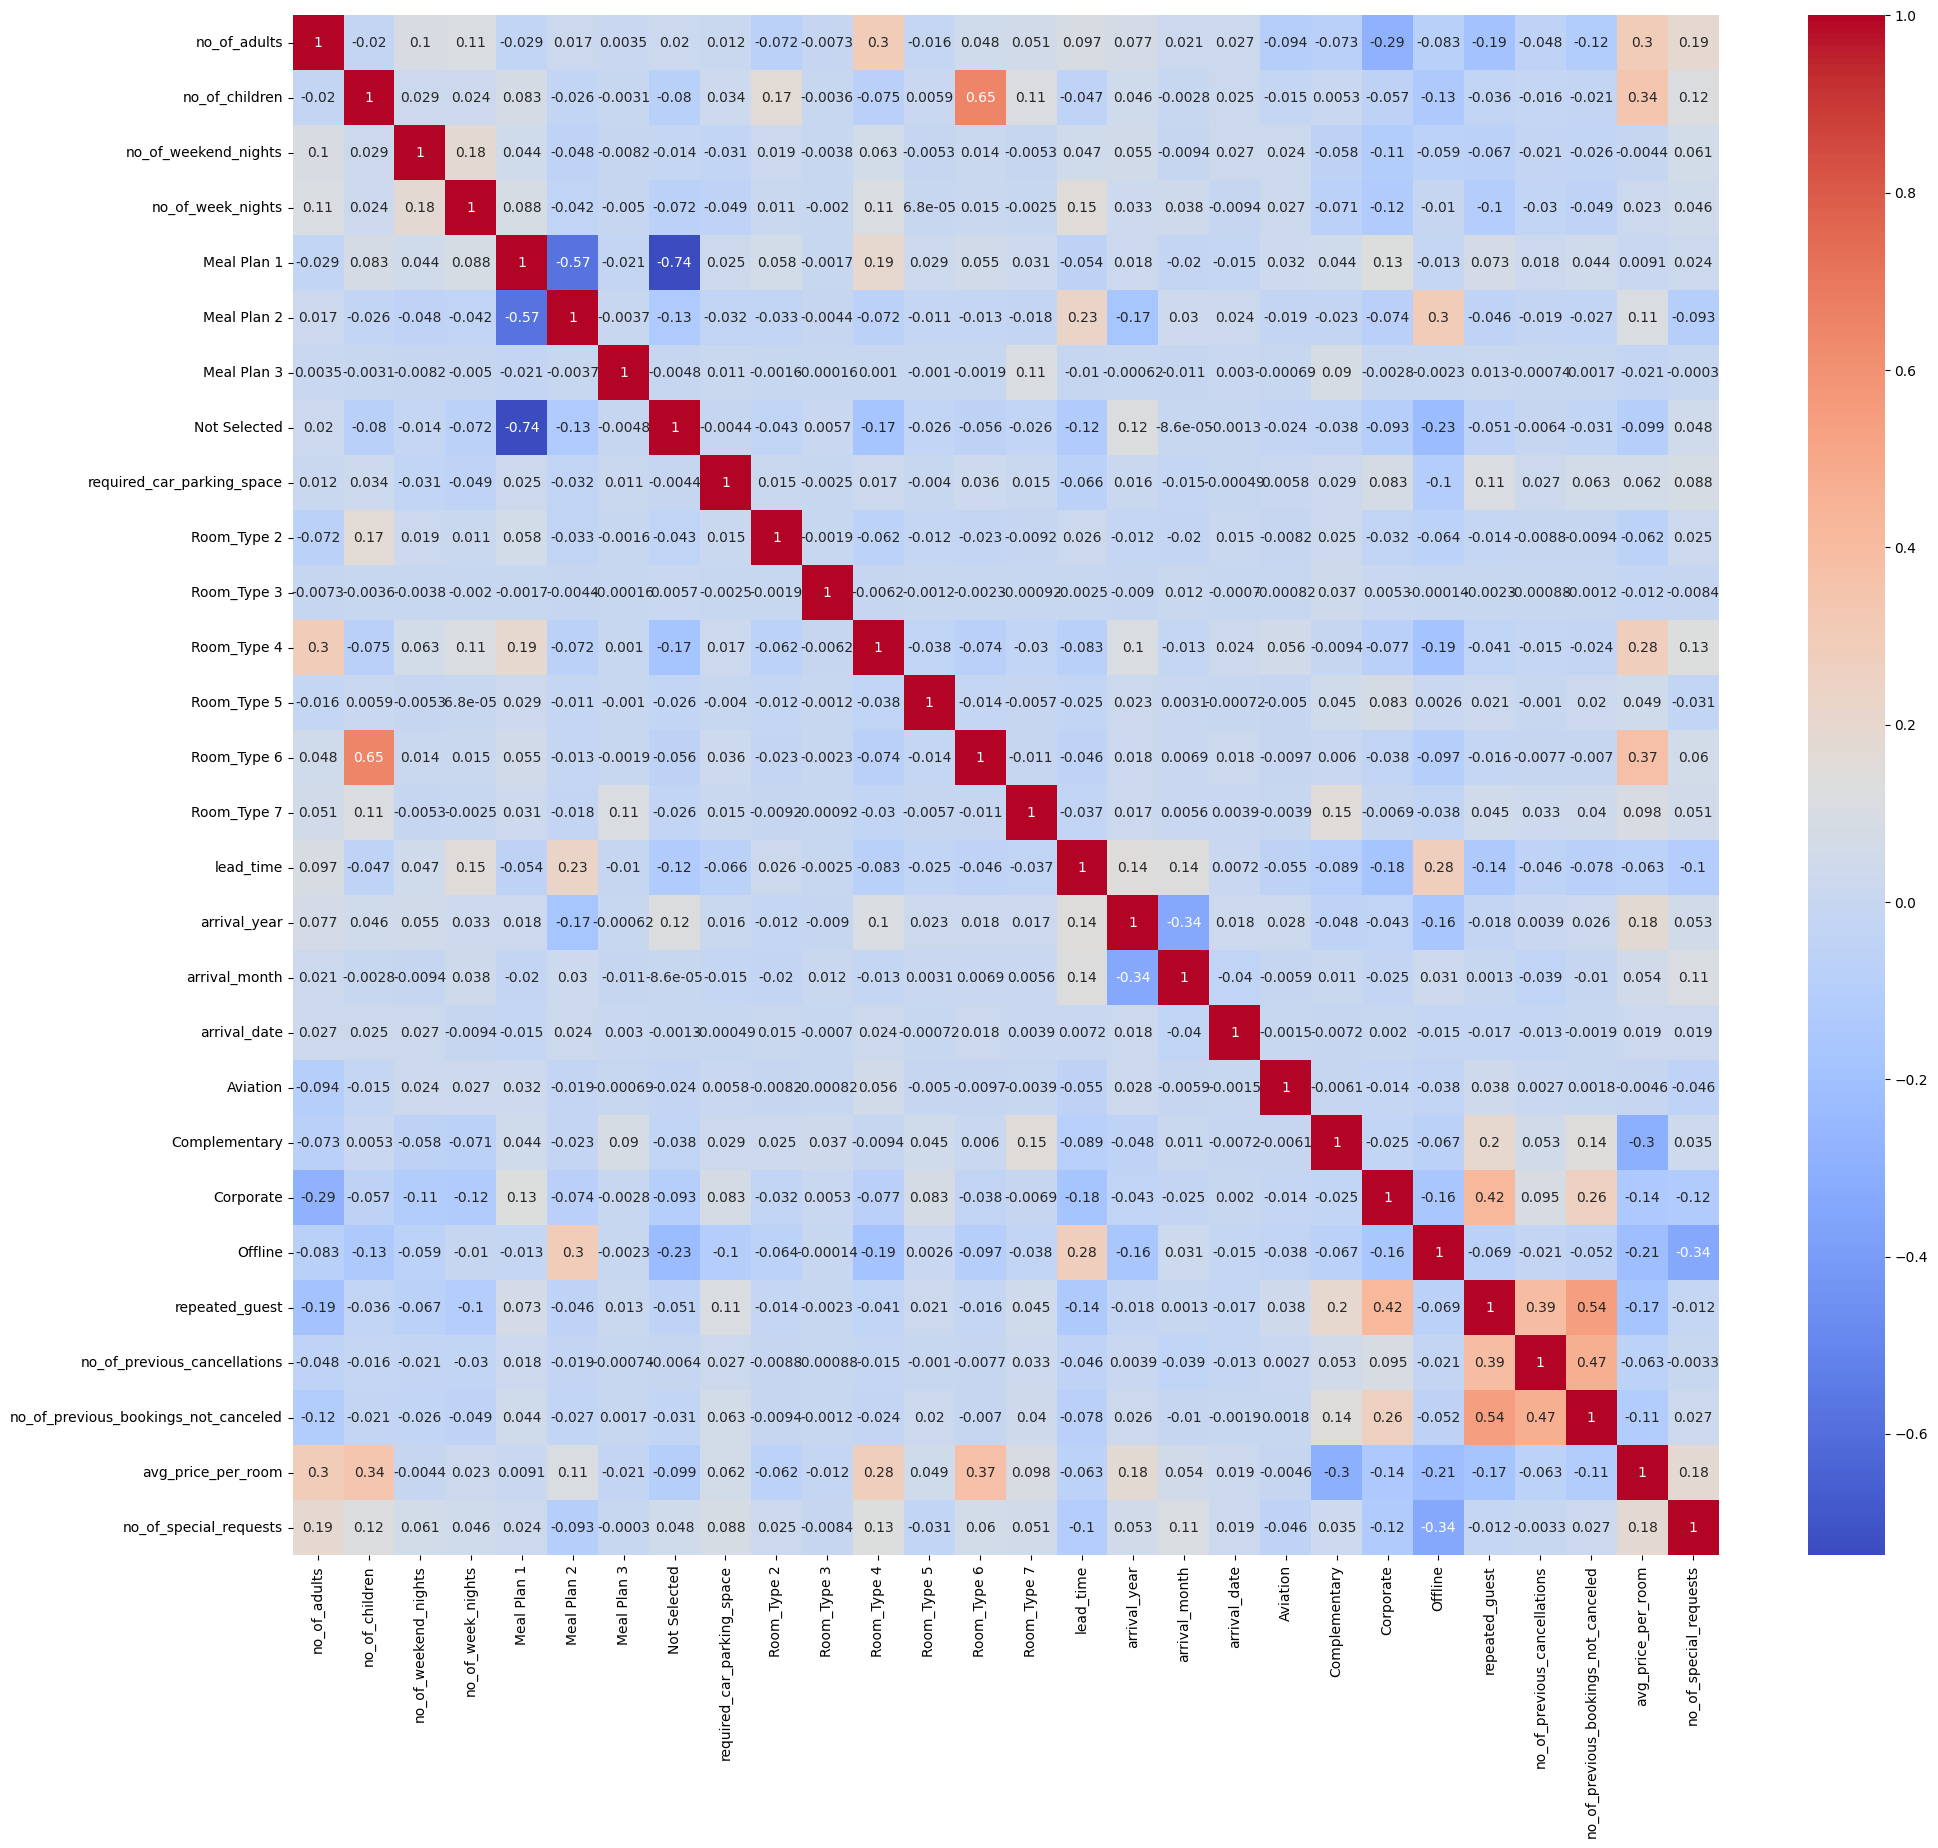

In [24]:
plt.figure(figsize=(23, 20))
sns.heatmap(df_copia2.corr(), cmap='coolwarm', annot=True)
plt.show()

In [25]:
print(df_copia2.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3',
       'Not Selected', 'required_car_parking_space', 'Room_Type 2',
       'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6',
       'Room_Type 7', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'Aviation', 'Complementary', 'Corporate', 'Offline',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


#### **3.2. Estandarizamos los datos del DataFrame df_copia2.**

In [26]:
scaler = StandardScaler()
data2_estandarizado = scaler.fit_transform(df_copia2)
display(data2_estandarizado)

array([[ 0.29832217, -0.26139625,  0.2175996 , ..., -0.08723968,
        -1.09558491, -0.78835579],
       [ 0.29832217, -0.26139625,  1.36573214, ..., -0.08723968,
         0.09242849,  0.4832741 ],
       [-1.63007575, -0.26139625,  1.36573214, ..., -0.08723968,
        -1.23810091, -0.78835579],
       ...,
       [ 0.29832217, -0.26139625,  1.36573214, ..., -0.08723968,
        -0.14386304,  1.75490398],
       [ 0.29832217, -0.26139625, -0.93053294, ..., -0.08723968,
        -0.25474049, -0.78835579],
       [ 0.29832217, -0.26139625,  0.2175996 , ..., -0.08723968,
         1.65981949, -0.78835579]])

In [27]:
data2_estandarizado2 = pd.DataFrame(df_copia2)
display(data2_estandarizado2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,required_car_parking_space,Room_Type 2,...,arrival_date,Aviation,Complementary,Corporate,Offline,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,0,0,0,0,...,2,0,0,0,1,0,0,0,65.00,0
1,2,0,2,3,0,0,0,1,0,0,...,6,0,0,0,0,0,0,0,106.68,1
2,1,0,2,1,1,0,0,0,0,0,...,28,0,0,0,0,0,0,0,60.00,0
3,2,0,0,2,1,0,0,0,0,0,...,20,0,0,0,0,0,0,0,100.00,0
4,2,0,1,1,0,0,0,1,0,0,...,11,0,0,0,0,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,167.80,1
36271,2,0,1,3,1,0,0,0,0,0,...,17,0,0,0,0,0,0,0,90.95,2
36272,2,0,2,6,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,98.39,2
36273,2,0,0,3,0,0,0,1,0,0,...,21,0,0,0,0,0,0,0,94.50,0


In [28]:
print(data2_estandarizado2.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3',
       'Not Selected', 'required_car_parking_space', 'Room_Type 2',
       'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6',
       'Room_Type 7', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'Aviation', 'Complementary', 'Corporate', 'Offline',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


#### **3.3. Train & Test**

In [29]:
X = data2_estandarizado2
y = df_copia['booking_status']

#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, shuffle = True, random_state = 0)

In [30]:
display(X)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,required_car_parking_space,Room_Type 2,...,arrival_date,Aviation,Complementary,Corporate,Offline,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,0,0,0,0,...,2,0,0,0,1,0,0,0,65.00,0
1,2,0,2,3,0,0,0,1,0,0,...,6,0,0,0,0,0,0,0,106.68,1
2,1,0,2,1,1,0,0,0,0,0,...,28,0,0,0,0,0,0,0,60.00,0
3,2,0,0,2,1,0,0,0,0,0,...,20,0,0,0,0,0,0,0,100.00,0
4,2,0,1,1,0,0,0,1,0,0,...,11,0,0,0,0,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,167.80,1
36271,2,0,1,3,1,0,0,0,0,0,...,17,0,0,0,0,0,0,0,90.95,2
36272,2,0,2,6,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,98.39,2
36273,2,0,0,3,0,0,0,1,0,0,...,21,0,0,0,0,0,0,0,94.50,0


In [31]:
display(y)

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36238, dtype: uint8

# **4. ENTRENAMIENTO Y VALIDACIÓN DEL MODELO**

#### **4.1. Instanciamos y Aplicamos el Modelo de Regresión Logística**

- Instanciamos el modelo que se va a aplicar (Regresión Logística) y vemos la precisión que obtenemos en el conjunto de entrenamiento (train) y en el de prueba (test). Como se puede apreciar, la precision en train es de 0.791 y en el de test es de 0.789. No se ve que exista overfitting ya que la precisión en train y test es prácticamente la misma. Conseguir una precisión de casi un 80% es un buen resultado. 

- Debido a que este ejercicio consistía en únicamente aplicar Regresión Lineal o Regresión Logística (para este caso Logística), puede ser que si se hubiera aplicado otro tipo de modelo, se habría conseguido una precisión mayor. 

In [32]:
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none', random_state=0,).fit(X_train, y_train)
print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg.score(X_train,y_train)))
print("Precisión del conjunto de prueba: {:.3f}".format(logreg.score(X_test,y_test)))

Precisión del conjunto de entrenamiento: 0.791
Precisión del conjunto de prueba: 0.789


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **4.2. Matriz de Confusión**

Se representa la matriz de confusión, de esta manera vamos a ser capaces de evaluar el rendimiento de nuestro modelo de clasificación. En la siguiente tabla se muestran los resultados de la clasificación comparando las etiquetas verdaderas de las muestras con las etiquetas predichas por el modelo. Se ha clasificado de la siguiente manera: **'Not Canceled' = 1 ; 'Canceled' = 0**.
  
  - **Verdaderos positivos (los 6497):** indica la cantidad de muestras que fueron clasificadas correctamente como positivas ('Not Canceled' = 1). Es decir, el modelo clasificó a clientes como que NO habían cancelado la reserva siendo realmente así como sucedió. 
  - **Verdaderos negativos (los 2078):** indica la cantidad de muestras que fueron clasificadas correctamente como negativas('Canceled' = 0). Es decir, el modelo clasificó a clientes como que SÍ habían cancelado la reserva siendo realmente así como sucedió.

Es de gran interés analizar los **Falsos Positivos (los 1498)** y los **Falsos Negativos (los 799)** ya que nos dan una idéa de cuánto nos estamos equivacando, ya que podemos estar tomando medidas estratégicas equivocadas, como por ejemplo: 

  - Para el caso de predecir que una persona va a cancelar la reserva, el hotel como empresa que es, podría tomar medidas al respecto para hacer ofertas personalizadas y así evitar que se cancele la reserva. Pero si le hacemos esta reserva a una persona que no tenía intención de cancelarla y no se lo hacemos a aquella que sí pensaba cancelarla, estamos perdiendo el tiempo y recursos en ofrecerle algo a alguien cuando se le tendría que ofrecer a otra persona y así evitar la cancelación de la reserva. 

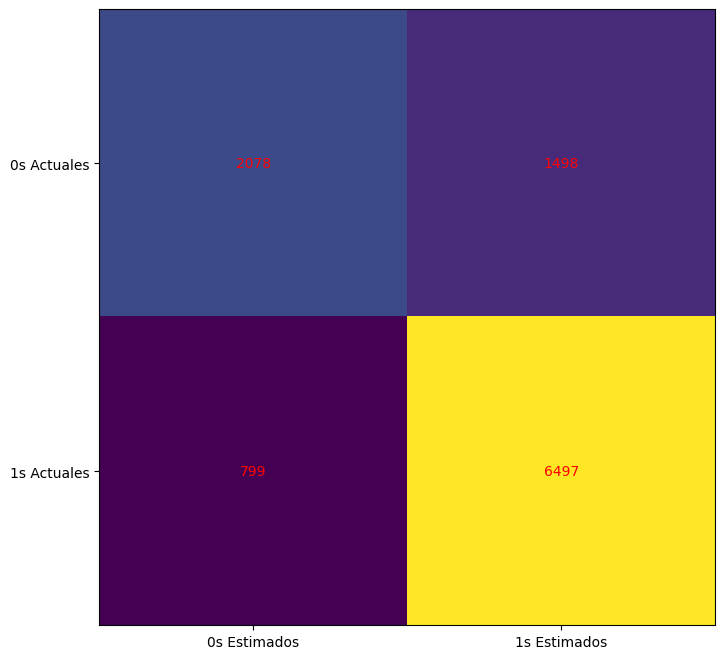

In [33]:
from sklearn import metrics
from matplotlib.pyplot import subplots, show

y_pred = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

# Dibujo de la matriz de confusion
fig, ax = subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Estimados', '1s Estimados'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Actuales', '1s Actuales'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
show()

In [34]:
#define array of actual classes
actual = np.repeat([1, 0], repeats=[160, 240])

#### **4.3. Curva de ROC**

Según el AUC obtenido de la Curva de ROC (AUC = 0.8476), se puede decir que el clasificador tiene una buena capacidad para dintinguir entre las dos clases 'Not Canceled' y 'Canceled'. Discrimina bastante bien. 

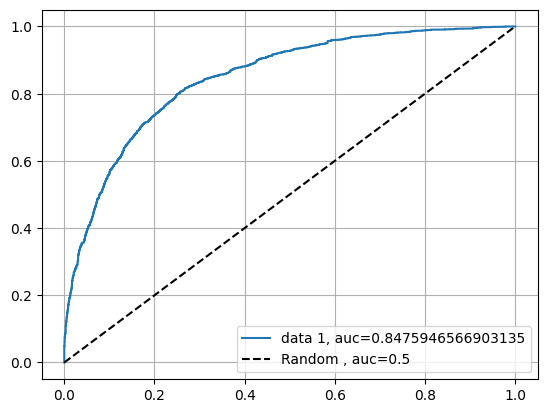

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random , auc=0.5')
plt.legend(loc=4)
plt.grid()
plt.show()


## **Conclusión de los Resultados:**

Como se comentó anteriormente, se evaluó el mismo modelo, uno sin eliminar outliers pero haciendo la limpieza de datos que se puede ver en este mismo Notebook y el otro eliminando outliers y haciendo esta misma limpieza. 

Los resultados son bastante similares, pero aunque la precisón del modelo en el conjunto de entrenamiento cuando se eliminan outliers, es mejor que cuando no se eliminan outliers, la Curva de ROC cuando se eliminan outliers es peor que cuando no se eliminan, por ello, dado que al hotel lo que más le interesa es ser capaz de distinguir entre los clientes de ambas clases, preferiremos el modelo sin eliminar outliers (el que tiene un AUC = 0.8475).

Se preferirá el modelo con un AUC = 0.8475, ya que este modelo tiene una alta capacidad para distinguir entre las reservas que se van a cancelar de las que no. Esto significa que el modelo se puede utilizar para identificar de manera efectiva las reservas que son más propensas a ser canceladas, lo que puede ayudar al hotel a tomar medidas para gestionar sus recursos y maximizar la ocupación de las habitaciones. 

Estos resultados, también se podrían interpretar como que este modelo es una buena herramienta para la gestión de reservas y la optimización de recursos. Por ejemplo, el hotel podrá tomar decisiones para reducir las cancelaciones. Esto lo puede hacer, mediante el envío de correos electrónicos a modo de recordatorio de las reservas, ofertas y descuentos, etc.

